In [1]:
!pip install pafy youtube-dl moviepy

In [2]:
!C:\Users\setu925\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip

In [3]:
#import statements
import os
import math
import pafy
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import cv2

from moviepy.editor import *
from collections import deque

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
#Setting constant seed

seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [5]:
!DIR

 Volume in drive K is New Volume
 Volume Serial Number is BAAF-2B2E

 Directory of K:\Code\Research\RIT\Activity_Recognition\HAR-Human_Activity_Recognition-

07/20/2022  10:51 AM    <DIR>          .
07/20/2022  10:51 AM    <DIR>          ..
07/20/2022  08:45 AM    <DIR>          .ipynb_checkpoints
07/20/2022  08:45 AM    <DIR>          BIT-Interaction
07/20/2022  10:51 AM         1,443,457 HAR_Human_Activity_Recognition.ipynb
07/20/2022  08:43 AM            11,558 LICENSE
07/20/2022  08:43 AM                33 README.md
01/27/2015  11:17 PM    <DIR>          videos
               3 File(s)      1,455,048 bytes
               5 Dir(s)  66,653,741,056 bytes free


['bend', 'box', 'handshake', 'hifive', 'hug', 'kick', 'pat', 'push']


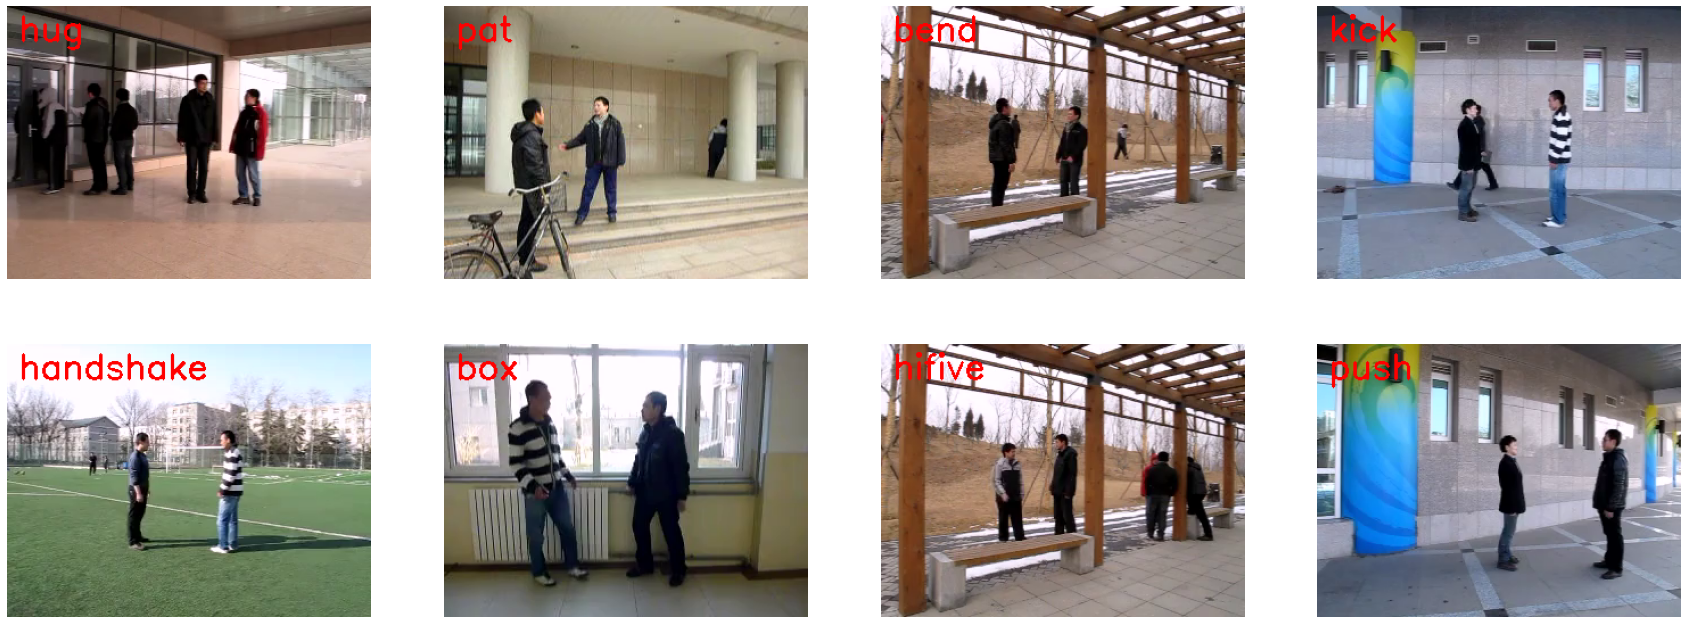

In [6]:
#Visualizing the data

plt.figure(figsize=(30,30))
all_class_names = os.listdir('videos')
all_class_names.remove('.DS_Store')

random_range = random.sample(range(len(all_class_names)),8)
for counter, random_index in enumerate(random_range,1):
    selected_class_name = all_class_names[random_index]
    video_files_names_list = os.listdir(f'videos/{selected_class_name}')
    selected_video_file = random.choice(video_files_names_list)
    video_reader = cv2.VideoCapture(f'videos/{selected_class_name}/{selected_video_file}')
    
    _, bgr_frame = video_reader.read()
    video_reader.release()
    
    rgb_frame = cv2.cvtColor(bgr_frame,cv2.COLOR_BGR2RGB)
    
    cv2.putText(rgb_frame,selected_class_name,(10,30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    
    plt.subplot(5,4,counter)
    plt.imshow(rgb_frame)
    plt.axis('off')
    
#print(video_files_names_list)
print(all_class_names)

In [27]:
#Data

image_height, image_width = 100,100
max_images_per_class = 1000

data_dir = "videos"

classes_list = all_class_names[3:]
print(classes_list)

model_output_size = len(classes_list)

['hifive', 'hug', 'kick', 'pat', 'push']


In [28]:
def frames_extraction(video_path):
    frames_list = []
    
    video_reader = cv2.VideoCapture(video_path)
    while True:
        success, frame = video_reader.read()
        if not success:
            break
        
        resized_frame = cv2.resize(frame,(image_height,image_width))
        
        normalized_frame = resized_frame/255
        
        frames_list.append(normalized_frame)
    video_reader.release()
    return frames_list

In [29]:
def create_dataset():
    temp_features = []
    features = []
    labels = []
    
    for class_index, class_name in enumerate(classes_list):
        print(class_name)
        
        files_list = os.listdir(os.path.join(data_dir, class_name))
        
        for filename in files_list:
            video_file_path = os.path.join(data_dir,class_name,filename)
            print(video_file_path)
            
            frames = frames_extraction(video_file_path)
            
            temp_features.extend(frames)
        
        features.extend(random.sample(temp_features,max_images_per_class))
            
        labels.extend([class_index]*max_images_per_class)
            
        temp_features.clear()
    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels

In [30]:
features, labels = create_dataset()

hifive
videos\hifive\hifive_0001.avi
videos\hifive\hifive_0002.avi
videos\hifive\hifive_0003.avi
videos\hifive\hifive_0004.avi
videos\hifive\hifive_0005.avi
videos\hifive\hifive_0006.avi
videos\hifive\hifive_0007.avi
videos\hifive\hifive_0008.avi
videos\hifive\hifive_0009.avi
videos\hifive\hifive_0010.avi
videos\hifive\hifive_0011.avi
videos\hifive\hifive_0012.avi
videos\hifive\hifive_0013.avi
videos\hifive\hifive_0014.avi
videos\hifive\hifive_0015.avi
videos\hifive\hifive_0016.avi
videos\hifive\hifive_0017.avi
videos\hifive\hifive_0018.avi
videos\hifive\hifive_0019.avi
videos\hifive\hifive_0020.avi
videos\hifive\hifive_0021.avi
videos\hifive\hifive_0022.avi
videos\hifive\hifive_0023.avi
videos\hifive\hifive_0024.avi
videos\hifive\hifive_0025.avi
videos\hifive\hifive_0026.avi
videos\hifive\hifive_0027.avi
videos\hifive\hifive_0028.avi
videos\hifive\hifive_0029.avi
videos\hifive\hifive_0030.avi
videos\hifive\hifive_0031.avi
videos\hifive\hifive_0032.avi
videos\hifive\hifive_0033.avi
vid

In [31]:
one_hot_encoded_labels = to_categorical(labels)

In [32]:
features_train,features_test, labels_train, labels_test = train_test_split(features,one_hot_encoded_labels, test_size=0.2, shuffle=True, random_state=seed_constant)

In [33]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',input_shape = (image_height,image_width,3)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size,activation='softmax'))
    
    model.summary()
    
    return model

model = create_model()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_2 (Batc  (None, 96, 96, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                      

In [34]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [35]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15,mode = 'min',restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ["accuracy"])

model_training_history = model.fit(x = features_train, y = labels_train, epochs = 25, batch_size = 4, shuffle=True, validation_split=0.2,callbacks = [early_stopping_callback])

Epoch 1/25
800/800 [==============================] - 102s 115ms/step - loss: 1.6878 - accuracy: 0.2181 - val_loss: 3.6181 - val_accuracy: 0.1838
Epoch 2/25
800/800 [==============================] - 92s 115ms/step - loss: 1.6548 - accuracy: 0.2113 - val_loss: 6.1383 - val_accuracy: 0.2037
Epoch 3/25
800/800 [==============================] - 99s 124ms/step - loss: 1.6382 - accuracy: 0.2188 - val_loss: 1.7588 - val_accuracy: 0.2663
Epoch 4/25
800/800 [==============================] - 94s 117ms/step - loss: 1.6200 - accuracy: 0.2456 - val_loss: 1.6839 - val_accuracy: 0.2013
Epoch 5/25
800/800 [==============================] - 94s 118ms/step - loss: 1.6149 - accuracy: 0.2428 - val_loss: 2.2412 - val_accuracy: 0.2037
Epoch 6/25
800/800 [==============================] - 94s 117ms/step - loss: 1.6013 - accuracy: 0.2716 - val_loss: 1.8785 - val_accuracy: 0.2350
Epoch 7/25
800/800 [==============================] - 94s 117ms/step - loss: 1.5893 - accuracy: 0.2650 - val_loss: 1.6609 - val_a

In [36]:
model_evaluation_history = model.evaluate(features_test,labels_test)

32/32 [==============================] - 17s 153ms/step - loss: 1.7644 - accuracy: 0.3220
